#Mini Projeto de Análise de Dados com Python

Dataset: Sales Data (Kaggle)

Link:https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [7]:
#Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Configurações para exibir gráficos no notebook
%matplotlib inline


##Etapa 1 – Leitura e Exploração Inicial

Vamos dar uma olhadinha nos dados:
- Quais colunas temos?
- Quantas linhas?
- Que tipo de dado vem em cada coluna?


In [6]:
# Leitura do arquivo CSV
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample 2.csv to sales_data_sample 2.csv


In [9]:
#Leitura do arquivo com o pandas
df = pd.read_csv('sales_data_sample.csv',encoding='latin1')

#Mostrar as 5 primeiras linhas.
df.head(5)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
# Informações básicas do DataFrame
print("Colunas:", df.columns.tolist())
print("Dimensão (linhas x colunas):", df.shape)
print("Tipos de dados:\n", df.dtypes)


Colunas: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Dimensão (linhas x colunas): (2823, 25)
Tipos de dados:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY    

##Etapa 2 – Estruturas de Dados: Lista, Dicionário, Tupla
Explorar os dados com estruturas básicas do Python.


In [11]:
# Lista com as primeiras categorias de produto
produtos = df['PRODUCTLINE'].tolist()
for produto in produtos[:5]:
    print("Categoria:", produto)


Categoria: Motorcycles
Categoria: Motorcycles
Categoria: Motorcycles
Categoria: Motorcycles
Categoria: Motorcycles


In [12]:
# Dicionário: PRODUCTCODE -> PRODUCTLINE
produto_categoria = dict(zip(df['PRODUCTCODE'], df['PRODUCTLINE']))
list(produto_categoria.items())[:3]


[('S10_1678', 'Motorcycles'),
 ('S10_1949', 'Classic Cars'),
 ('S10_2016', 'Motorcycles')]

In [13]:
# Tupla com dados de uma linha
linha = df.iloc[0]
tupla_info = (linha['CUSTOMERNAME'], linha['STATUS'], linha['SALES'])
print("Tupla com info do cliente:", tupla_info)


Tupla com info do cliente: ('Land of Toys Inc.', 'Shipped', np.float64(2871.0))


##Etapa 3 – Estruturas de Controle
Usando `if/else`, `for` e `while` para explorar lógica e fluxos nos dados.


In [14]:
# If / Else com valor de venda
venda = df['SALES'].iloc[0]
if venda > 5000:
    print("Venda alta!")
elif venda > 2000:
    print("Venda média.")
else:
    print("Venda baixa.")


Venda média.


In [15]:
# For: somando as 5 primeiras vendas
soma = 0
for i in range(5):
    soma += df['SALES'].iloc[i]
print("Soma das 5 primeiras vendas:", soma)


Soma das 5 primeiras vendas: 18473.21


In [16]:
# While: encontrar a primeira venda acima de 7000
i = 0
while i < len(df):
    if df['SALES'].iloc[i] > 7000:
        print("Venda alta encontrada:", df['SALES'].iloc[i])
        break
    i += 1


Venda alta encontrada: 7737.93


## ➕ Etapa 4 – Operações Aritméticas
Vamos simular um desconto de 10% e criar colunas novas.


In [18]:
df['DISCOUNT'] = df['SALES'] * 0.10
df['SALES_AFTER_DISCOUNT'] = df['SALES'] - df['DISCOUNT']
df[['SALES', 'DISCOUNT', 'SALES_AFTER_DISCOUNT']].head()


,SALES,DISCOUNT,SALES_AFTER_DISCOUNT
0,2871.00,287.100,2583.900
1,2765.90,276.590,2489.310
2,3884.34,388.434,3495.906
3,3746.70,374.670,3372.030
4,5205.27,520.527,4684.743


##Etapa 5 – NumPy e Arrays Numéricos
Transformar colunas em arrays e fazer operações vetorizadas.


In [19]:
sales_array = np.array(df['SALES'])

print("Média:", np.mean(sales_array))
print("Máximo:", np.max(sales_array))
print("Primeiras 3 vendas:", sales_array[:3])

# Modificando valor
sales_array[0] = 9999
print("Valor alterado:", sales_array[0])


Média: 3553.889071909316
Máximo: 14082.8
Primeiras 3 vendas: [2871.   2765.9  3884.34]
Valor alterado: 9999.0


##Etapa 6 – Pandas: Manipulação e Agrupamento
Selecionar, filtrar e agrupar dados para gerar análises simples.
**negrito**

In [20]:
# Seleção com .loc
df_shipped = df.loc[df['STATUS'] == 'Shipped']
df_shipped.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DISCOUNT,SALES_AFTER_DISCOUNT
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,287.100,2583.900
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,276.590,2489.310
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,388.434,3495.906
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,374.670,3372.030
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,520.527,4684.743


In [21]:
# Contagem por categoria
df['PRODUCTLINE'].value_counts()


,count
PRODUCTLINE,
Classic Cars,967
Vintage Cars,607
Motorcycles,331
Planes,306
Trucks and Buses,301
Ships,234
Trains,77


In [22]:
# Agrupamento: média de vendas por linha de produto
df.groupby('PRODUCTLINE')['SALES'].mean()


,SALES
PRODUCTLINE,
Classic Cars,4053.377104
Motorcycles,3523.831843
Planes,3186.286176
Ships,3053.150128
Trains,2938.226883
Trucks and Buses,3746.810100
Vintage Cars,3135.339110


##Etapa 7 – Visualização de Dados
Desenhar o invisível e dar vida aos números.


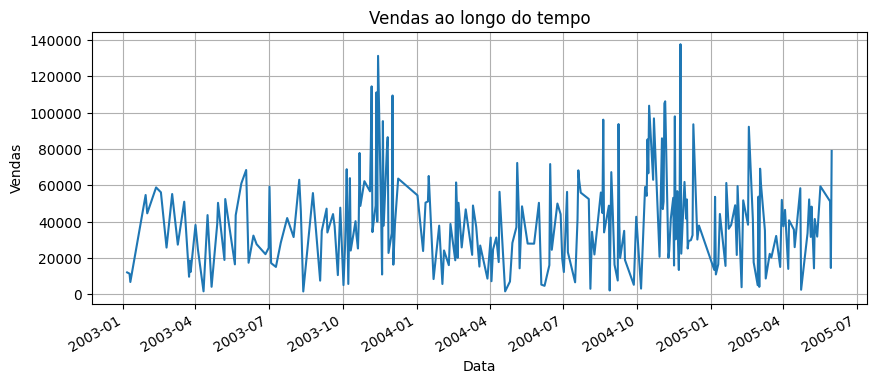

In [23]:
# Convertendo data para datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Gráfico de Linha – Vendas por data
df_time = df.groupby('ORDERDATE')['SALES'].sum()
df_time.plot(kind='line', figsize=(10, 4), title="Vendas ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid()
plt.show()


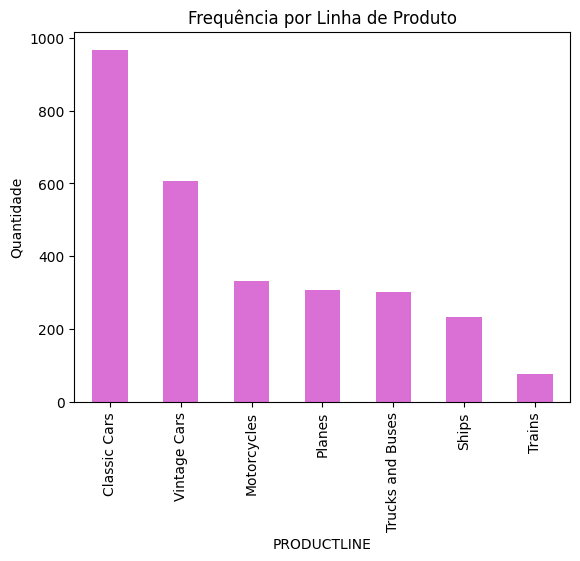

In [24]:
# Gráfico de Barras – Produtos
df['PRODUCTLINE'].value_counts().plot(kind='bar', color='orchid')
plt.title("Frequência por Linha de Produto")
plt.ylabel("Quantidade")
plt.show()


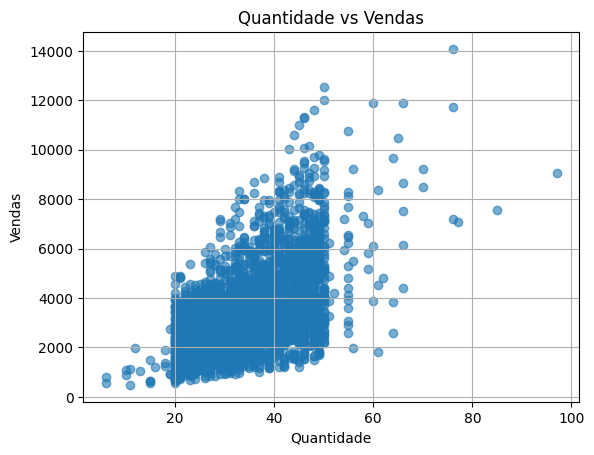

In [25]:
# Gráfico de Dispersão – Quantidade vs Venda
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6)
plt.title("Quantidade vs Vendas")
plt.xlabel("Quantidade")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()


##Etapa 8 – Insights e Conclusões

- Produtos da categoria X vendem mais em termos de volume.
- Pico de vendas aparece próximo de determinadas datas.
- Existe correlação entre a quantidade pedida e o valor final da venda.

###Recomendação
Focar as campanhas promocionais nas datas com maior pico de venda, e explorar os produtos mais vendidos para impulsionar combos e cross-selling.
